**Author: Prabaningrum Hendraswari Buditjahjono**

**Link Dashboard**

https://public.tableau.com/app/profile/prabaningrum/viz/BaltimoreHomicide/Story1?publish=yes

**Introduction**

The dataset shows the homicide data for the city of Baltimore from the years of 2007 all the way til present and updated almost monthly. Baltimore ranks 2nd on the highest murder rates in the United States, only second to St. Louis in Missouri. The data is obtained through the website, Baltimore Sun Homicide News through a Creative Commons License. The data shows details such as cause of death, police district in which the homicide occurred, and the name, age, gender and race of the victim, and more.

**Problem Statement**

The purpose of this analysis is to observe the possible patterns of homicide cases in Baltimore.

**Specified Problems**

1. Which parts of Baltimore has the highest percentage of Homicide?
2. What attributes does the victims typically have?

  a. by gender

  b. by race

  c. by age
3. On what timeframe does the homicide numbers increase significantly?
4. Does the victims on all parts of Baltimore have similar attributes?
5. Does race have a significant correlation with the homicide method?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Loading

**Data Reference**

https://www.kaggle.com/datasets/harbirbatth/baltimore-homicide-statistics

In [2]:
df= pd.read_csv ('BaltimoreHomicide.csv')
df

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,19:29:00,<p>Sinclair was shot after allegedly holding u...
1,3402,Name not yet released,NaN,NaN,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12,15:48:00,"<p>On May 12, 2019 at approximately 3:48 p.m.,..."
2,3417,Andre,Davis,25.0,male,unknown,unknown,unknown,ND,500 E 26th Street,21218,39.319180,-76.609010,2019-05-31,NaN,"<p>On May 25, 2019 at approximately 9:26 a.m.,..."
3,3459,Name not yet released,NaN,NaN,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,04:50:00,"<p>Morgan State Police were called for a ""non-..."
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03,04:45:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,6,Edward,Canupp,61.0,male,white,bluntforce,scene,SD,500 Maude Ave.,21225,39.238881,-76.602565,2007-01-05,02:20:00,NaN
4287,5,Thomas,MacKenney,21.0,male,black,asphyxiation,scene,ND,5900 Northwood Drive,21212,39.364241,-76.599179,2007-01-03,14:00:00,NaN
4288,4,Nelsene,Burnette,44.0,female,black,bluntforce,scene,WD,2000 West North Ave,21217,39.309954,-76.650051,2007-01-02,18:30:00,NaN
4289,3,Eddie,Golf,26.0,male,black,shooting,scene,SW,4900 Challedon Road,21207,39.312646,-76.699146,2007-01-02,14:48:00,NaN


In [3]:
#Looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4291 non-null   int64  
 1   first_name      4241 non-null   object 
 2   last_name       4236 non-null   object 
 3   age             4248 non-null   float64
 4   gender          4291 non-null   object 
 5   race            4291 non-null   object 
 6   cause           4291 non-null   object 
 7   death_loc       4291 non-null   object 
 8   district        4291 non-null   object 
 9   street_address  4291 non-null   object 
 10  zip_code        4291 non-null   int64  
 11  latitude        4291 non-null   float64
 12  longitude       4291 non-null   float64
 13  date            4291 non-null   object 
 14  time            3797 non-null   object 
 15  notes           1178 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 536.5+ KB


In [4]:
#Changing the data type of some columns
df['date']= pd.to_datetime(df['date'])
df['time']= pd.to_datetime(df['time'])

In [5]:
#Checking the data
df.head(5)

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,2022-11-01 19:29:00,<p>Sinclair was shot after allegedly holding u...
1,3402,Name not yet released,NaN,NaN,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12,2022-11-01 15:48:00,"<p>On May 12, 2019 at approximately 3:48 p.m.,..."
2,3417,Andre,Davis,25.0,male,unknown,unknown,unknown,ND,500 E 26th Street,21218,39.319180,-76.609010,2019-05-31,NaT,"<p>On May 25, 2019 at approximately 9:26 a.m.,..."
3,3459,Name not yet released,NaN,NaN,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,2022-11-01 04:50:00,"<p>Morgan State Police were called for a ""non-..."
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03,2022-11-01 04:45:00,NaN


In [6]:
#Checking missing values
df.isnull().sum()

id                   0
first_name          50
last_name           55
age                 43
gender               0
race                 0
cause                0
death_loc            0
district             0
street_address       0
zip_code             0
latitude             0
longitude            0
date                 0
time               494
notes             3113
dtype: int64

The missing values here are mostly considered normal so almost no entry should be dropped, as long as we're only trying to describe the data as a whole. This is due to how some victims might be found in less than ideal situations whether they were unrecognized, having their time of death unknown, having a ruined/tampered crime scene thus not being able to find enough evidence, or other reasons that might not make it possible for the authorities to find other informations regarding the homicide.

Regarding the age column, though the missing values are not dropped, they should be filled with median value in order to not disturb the distribution of the data.

In [7]:
#Creating & cleaning dataframe for visualization & descriptive statistics
df2 = df.copy()
df2['first_name'] = df2['first_name'].fillna(value='unknown')
df2['last_name'] = df2['last_name'].fillna(value='unknown')
df2['time'] = df2['time'].fillna(value='unknown')
df2['notes'] = df2['notes'].fillna(value='No Notes')
df2.head(5)

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,2022-11-01 19:29:00,<p>Sinclair was shot after allegedly holding u...
1,3402,Name not yet released,unknown,NaN,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12,2022-11-01 15:48:00,"<p>On May 12, 2019 at approximately 3:48 p.m.,..."
2,3417,Andre,Davis,25.0,male,unknown,unknown,unknown,ND,500 E 26th Street,21218,39.319180,-76.609010,2019-05-31,unknown,"<p>On May 25, 2019 at approximately 9:26 a.m.,..."
3,3459,Name not yet released,unknown,NaN,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,2022-11-01 04:50:00,"<p>Morgan State Police were called for a ""non-..."
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03,2022-11-01 04:45:00,No Notes


In [8]:
print(df2['age'].min())
print(df2['age'].mean())
print(df2['age'].mode())
print(df2['age'].median())

0.0
31.095809792843692
0    24.0
Name: age, dtype: float64
29.0


In [9]:
df2['age'] = df2['age'].fillna(29)
df2.head(5)

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,2022-11-01 19:29:00,<p>Sinclair was shot after allegedly holding u...
1,3402,Name not yet released,unknown,29.0,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12,2022-11-01 15:48:00,"<p>On May 12, 2019 at approximately 3:48 p.m.,..."
2,3417,Andre,Davis,25.0,male,unknown,unknown,unknown,ND,500 E 26th Street,21218,39.319180,-76.609010,2019-05-31,unknown,"<p>On May 25, 2019 at approximately 9:26 a.m.,..."
3,3459,Name not yet released,unknown,29.0,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,2022-11-01 04:50:00,"<p>Morgan State Police were called for a ""non-..."
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03,2022-11-01 04:45:00,No Notes


In [10]:
#Checking the districts
df2['district'].value_counts()

WD    661
ED    640
SW    578
NW    561
NE    551
SD    420
SE    292
ND    290
CD    279
??     19
Name: district, dtype: int64

From checking the district column, it is found that there are 19 entries where the input is invalid. Just in case that column is needed for inferential statistics, it wouldn't make sense if we try to keep those entries because the question remains on how is it possible that the authorities not know which part of Baltimore the victim is found in. Therefore, it's decided to drop those entries. The missing values on other columns such as age and cause are also dropped for the same purpose

In [11]:
#Creating & cleaning dataframe for inferential statistics
df3 = df2.copy()
df3 = (df3.dropna(subset=['age']))
df3

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,2022-11-01 19:29:00,<p>Sinclair was shot after allegedly holding u...
1,3402,Name not yet released,unknown,29.0,female,unknown,unknown,unknown,NW,3901 Clarks Lane,21215,39.358600,-76.702790,2019-05-12,2022-11-01 15:48:00,"<p>On May 12, 2019 at approximately 3:48 p.m.,..."
2,3417,Andre,Davis,25.0,male,unknown,unknown,unknown,ND,500 E 26th Street,21218,39.319180,-76.609010,2019-05-31,unknown,"<p>On May 25, 2019 at approximately 9:26 a.m.,..."
3,3459,Name not yet released,unknown,29.0,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,2022-11-01 04:50:00,"<p>Morgan State Police were called for a ""non-..."
4,3487,Malachi,Lawson,4.0,male,black,unknown,scene,NW,5500 Haddon Ave,21207,39.336441,-76.702588,2019-08-03,2022-11-01 04:45:00,No Notes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,6,Edward,Canupp,61.0,male,white,bluntforce,scene,SD,500 Maude Ave.,21225,39.238881,-76.602565,2007-01-05,2022-11-01 02:20:00,No Notes
4287,5,Thomas,MacKenney,21.0,male,black,asphyxiation,scene,ND,5900 Northwood Drive,21212,39.364241,-76.599179,2007-01-03,2022-11-01 14:00:00,No Notes
4288,4,Nelsene,Burnette,44.0,female,black,bluntforce,scene,WD,2000 West North Ave,21217,39.309954,-76.650051,2007-01-02,2022-11-01 18:30:00,No Notes
4289,3,Eddie,Golf,26.0,male,black,shooting,scene,SW,4900 Challedon Road,21207,39.312646,-76.699146,2007-01-02,2022-11-01 14:48:00,No Notes


In [12]:
df3 = df3[df3['district'] != '??']
df3 = df3[df3['cause'] != 'unknown']
df3 = df3[df3['race'] != 'unknown']
df3

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
0,3298,Gregory,Sinclair,31.0,male,black,shooting,unknown,SE,2300 Fleet St,21224,39.285140,-76.584100,2019-01-12,2022-11-01 19:29:00,<p>Sinclair was shot after allegedly holding u...
3,3459,Name not yet released,unknown,29.0,male,hispanic,shooting,scene,NE,4700 Loch Raven Blvd,21239,39.347950,-76.592300,2019-07-11,2022-11-01 04:50:00,"<p>Morgan State Police were called for a ""non-..."
10,3591,John,Feggins,24.0,male,black,shooting,unknown,ND,6300 York Rd,21212,39.370825,-76.610610,2019-10-30,2022-11-01 09:40:00,<p>Police involved shooting</p>
51,4407,Jawan,Hall,25.0,male,black,shooting,unknown,NW,Liberty Heights Ave and Gwynn Oak Ave,21207,39.331344,-76.695616,2022-03-12,2022-11-01 20:20:00,"<p>Four people were shot, three of which died...."
52,4406,Darian,Savoy,26.0,male,black,shooting,unknown,NE,Liberty Heights Ave and Gwynn Oak Ave,21207,39.331344,-76.695616,2022-03-12,2022-11-01 20:20:00,"<p>Four people were shot, three of which died...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,6,Edward,Canupp,61.0,male,white,bluntforce,scene,SD,500 Maude Ave.,21225,39.238881,-76.602565,2007-01-05,2022-11-01 02:20:00,No Notes
4287,5,Thomas,MacKenney,21.0,male,black,asphyxiation,scene,ND,5900 Northwood Drive,21212,39.364241,-76.599179,2007-01-03,2022-11-01 14:00:00,No Notes
4288,4,Nelsene,Burnette,44.0,female,black,bluntforce,scene,WD,2000 West North Ave,21217,39.309954,-76.650051,2007-01-02,2022-11-01 18:30:00,No Notes
4289,3,Eddie,Golf,26.0,male,black,shooting,scene,SW,4900 Challedon Road,21207,39.312646,-76.699146,2007-01-02,2022-11-01 14:48:00,No Notes


## Data Exploratory Analysis

In [45]:
df['date'].max()

Timestamp('2022-04-06 00:00:00')

In [46]:
df['date'].min()

Timestamp('2007-01-01 00:00:00')

This shows that the last entry to this data is the data on 6th of April 2022.

**Which part of Baltimore has the highest percentage of homicide?**

In [47]:
#Baltimore areas
tot_d = df['district'].value_counts()

<BarContainer object of 10 artists>

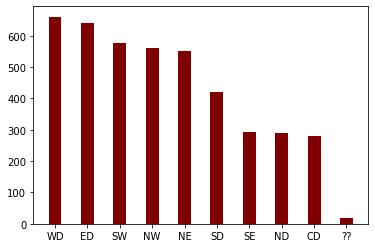

In [48]:
plt.bar(x = tot_d.index, height = tot_d, color ='maroon',
        width = 0.4)

From the analysis, it's known that the top 3 districts that has the highest number of homicide from 2007-2022 are Western (WD), Eastern (ED), and Southwestern (SW). There is a label that doesn't provide any information as to where the homicide occured.

This data should be adjusted with the population number in each district for further analysis. This is because even the numbers of homicide might not take into account the population density of the area.

**What attributes does the victims typically have?**

In [49]:
#Gender
tot_g = df['gender'].value_counts()
tot_g

male       3847
female      438
unknown       6
Name: gender, dtype: int64

C:\Users\praba\AppData\Local\Temp\ipykernel_13228\2164898941.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


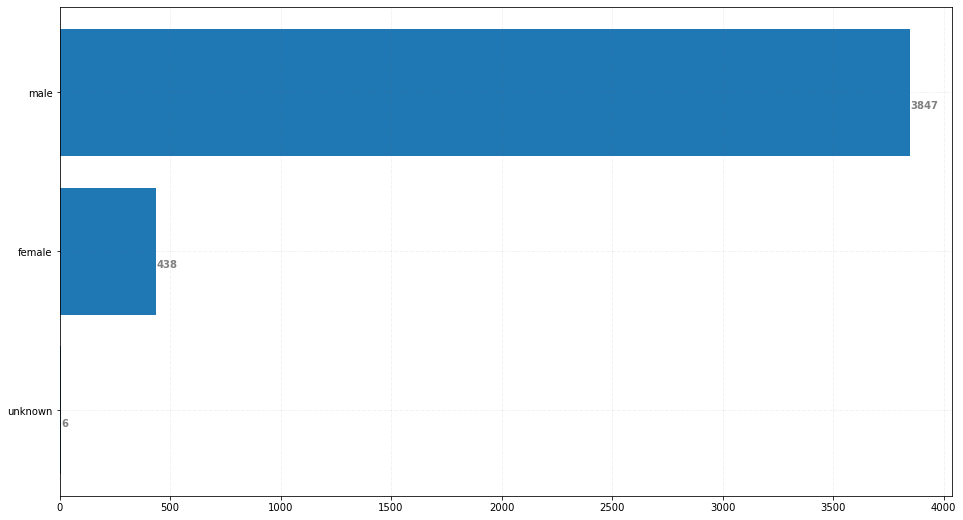

In [50]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(tot_g.index, tot_g) 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

The data shows that most of the homicide victims in Baltimore are males with 3847 cases while female victims are only making out to be 438 cases. This should also be compared to the real population and societal phenomenon in Baltimore.

The unknown label in this column is questionable due to our inability to verify the cause of 6 cases being put into unknown gender. For all we know it could be a birth condition (intersex), or the due to the body retrieval condition.

In [51]:
#Race
op = ['asian', 'black', 'hispanic', 'unknown','white']
tot_r = df['race'].value_counts()
tot_r

black       3320
unknown      695
white        195
hispanic      68
asian         13
Name: race, dtype: int64

In [52]:
#Creating dataset
col = set(df['race'])
tot1 = df2.groupby('race')['race'].count()
tot1

race
asian         13
black       3320
hispanic      68
unknown      695
white        195
Name: race, dtype: int64

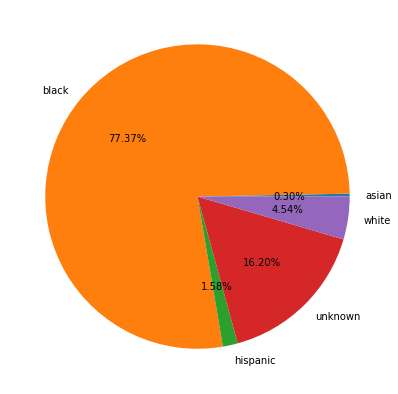

In [53]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(tot1, labels = op, autopct='%.2f%%')
 
# show plot
plt.show()

The data shows that a huge number of the victims are black people making up to be 77.37% of the total cases while other races only making up below 5% of the total cases with asian people having the lowest percentage at 0.30%. The result of this data needs to be compared to the real data population in order to understand why black people are making out to be the highest number of victims.

From this data it should also be highlighted that there is an unknown label. We also can't verify why some of the victims' races are unknown, but from sheer assumption, it could be because some of them are multiracial, or perhaps it's due to the condition of the body when it's retrieved making it difficult to determine their race.

In [57]:
#Age
df2['age'].value_counts().sort_index() #looking at the min and max value

0.0      5
1.0     42
2.0     13
3.0      5
4.0      5
        ..
85.0     1
86.0     1
90.0     1
91.0     1
97.0     1
Name: age, Length: 88, dtype: int64

In [58]:
df2['age'].value_counts() #looking at the most prevalent age in the case

29.0    216
24.0    208
26.0    206
25.0    178
21.0    175
       ... 
90.0      1
97.0      1
75.0      1
76.0      1
81.0      1
Name: age, Length: 88, dtype: int64

In [59]:
print(df2['age'].min())
print(df2['age'].mean())
print(df2['age'].mode())
print(df2['age'].median())
print(df2['age'].max())

0.0
31.074807737124214
0    29.0
Name: age, dtype: float64
29.0
97.0


In [60]:
df2['age'].skew()

0.9914622300011919

In [61]:
print('Sorted Age : ', sorted(list(df2['age'])), '\n')

n, bins = np.histogram(df2['age'], bins=50)
for ii in range(0, len(n)):
  print('Bins Border - ' , ii, ': ', bins[ii], ' - ', bins[ii+1], '\t', ' Frequency : ', n[ii])

Sorted Age :  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 1

(array([ 47.,  18.,   7.,   5.,   1.,   2.,   6.,  36., 136., 257., 344.,
        349., 386., 363., 382., 290., 124., 219., 199., 152., 149., 109.,
        113.,  97.,  86.,  66.,  73.,  53.,  37.,  37.,  36.,  22.,  14.,
          4.,  15.,  17.,   6.,   9.,   4.,   2.,   4.,   2.,   4.,   5.,
          1.,   0.,   2.,   0.,   0.,   1.]),
 array([ 0.  ,  1.94,  3.88,  5.82,  7.76,  9.7 , 11.64, 13.58, 15.52,
        17.46, 19.4 , 21.34, 23.28, 25.22, 27.16, 29.1 , 31.04, 32.98,
        34.92, 36.86, 38.8 , 40.74, 42.68, 44.62, 46.56, 48.5 , 50.44,
        52.38, 54.32, 56.26, 58.2 , 60.14, 62.08, 64.02, 65.96, 67.9 ,
        69.84, 71.78, 73.72, 75.66, 77.6 , 79.54, 81.48, 83.42, 85.36,
        87.3 , 89.24, 91.18, 93.12, 95.06, 97.  ]),
 <BarContainer object of 50 artists>)

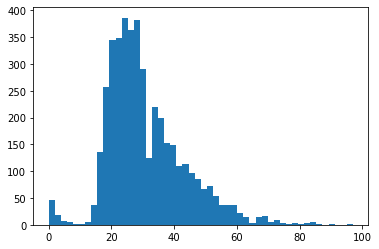

In [27]:
plt.hist(df2['age'],bins=50)

It is known that the minimum age is 0. This is either because the data input is wrong or the victim is actually an infant/a newborn. The oldest victim that's been killed is 97 years old. 


There are also a large number of people killed at the age of 29. However, this might be because it's affected by the missing value that's replaced by the median (43 entries). This makes the more accurate mode to be 24, meaning that a large number of the people killed are aged 24 years old. 

The data has a mean of 31. This is affected with the data that is moderately skewed to the right since there are also elderly people who got killed even though the majority of the cases are in their 20s. 

From the analysis above, it can be inferred that most of the victims are black males aged 19-29

**Does the victims on all parts of Baltimore have similar attributes?**

Gender Comparison Between Top 3 District With Most Homicides

In [28]:
com_dis = df2[(df2['district'] == 'WD') | (df2['district'] == 'ED') | (df2['district'] == 'SW')]
com_dis

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
5,3498,Name not yet released,unknown,24.0,male,unknown,shooting,shock-trauma,WD,1100 Mosher St,21217,39.300124,-76.639528,2019-08-07,2022-11-01 21:10:00,No Notes
9,3550,unknown,unknown,49.0,male,unknown,shooting,scene,ED,1500 Barclay St,21202,39.307350,-76.611080,2019-10-04,2022-11-01 22:12:00,No Notes
13,3694,Richard,Diggs,76.0,male,unknown,stabbing,scene,WD,2200 Walbrook Ave,21216,39.310940,-76.652920,2020-02-25,2022-11-01 17:05:00,No Notes
16,3732,unknown,unknown,23.0,male,unknown,shooting,scene,WD,2300 Evergreen St,21216,39.314064,-76.660662,2020-04-19,2022-11-01 00:16:00,No Notes
18,3896,unknown,unknown,19.0,male,unknown,shooting,scene,WD,2300 Presbury St,21216,39.307635,-76.654153,2020-09-25,2022-11-01 10:51:00,<p>Double fatal</p>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,16,William,Davis,26.0,male,black,shooting,johns-hopkins-hospital,ED,1200 North Caroline St.,21213,39.304303,-76.598202,2007-01-09,2022-11-01 22:20:00,No Notes
4283,9,Yule,Henderson,21.0,male,black,shooting,johns-hopkins-hospital,ED,1800 North Montford Ave.,21213,39.311385,-76.584725,2007-01-07,2022-11-01 12:01:00,No Notes
4288,4,Nelsene,Burnette,44.0,female,black,bluntforce,scene,WD,2000 West North Ave,21217,39.309954,-76.650051,2007-01-02,2022-11-01 18:30:00,No Notes
4289,3,Eddie,Golf,26.0,male,black,shooting,scene,SW,4900 Challedon Road,21207,39.312646,-76.699146,2007-01-02,2022-11-01 14:48:00,No Notes


In [29]:
com_dis.groupby(['district', 'gender'])['date'].count()

district  gender 
ED        female      64
          male       576
SW        female      56
          male       521
          unknown      1
WD        female      55
          male       605
          unknown      1
Name: date, dtype: int64

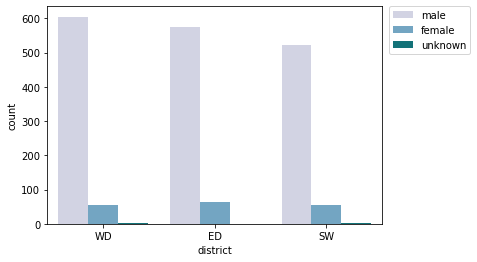

In [30]:
sns.countplot(data=com_dis, x='district', hue='gender', palette= 'PuBuGn')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Race Comparison Between Top 3 District With Most Homicides

In [31]:
com_dis.groupby(['district', 'race'])['date'].count()

district  race    
ED        asian         2
          black       530
          hispanic      1
          unknown      95
          white        12
SW        black       462
          hispanic      1
          unknown      92
          white        23
WD        black       537
          hispanic      1
          unknown     113
          white        10
Name: date, dtype: int64

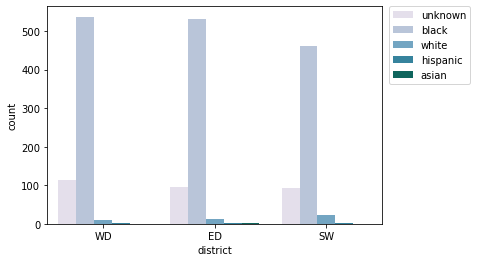

In [32]:
sns.countplot(data=com_dis, x='district', hue='race', palette= 'PuBuGn')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Age Comparison Between Top 3 District With Most Homicides

In [33]:
temp=[]

for i in com_dis['age']:
  if i >=0 and i <=3:
    grp = 'Toddlers'
  elif i >=4 and i <=12:
    grp = 'Kids'
  elif i >=13 and i <=18:
    grp = 'Teens'
  elif i >=19 and i <=29:
    grp = 'Young Aduls'
  elif i >=30 and i <=59:
    grp = 'Middle Aged'
  elif i >=60:
    grp = 'Elderly'
  else:
    grp = 'Invalid'
  temp.append(grp)

In [34]:
com_dis['age_group'] = temp

C:\Users\praba\AppData\Local\Temp\ipykernel_13228\2414243849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_dis['age_group'] = temp


In [35]:
com_dis.groupby(['district', 'age_group'])['date'].count()

district  age_group  
ED        Elderly         18
          Kids             4
          Middle Aged    280
          Teens           34
          Toddlers         8
          Young Aduls    296
SW        Elderly         13
          Kids             4
          Middle Aged    224
          Teens           50
          Toddlers         8
          Young Aduls    279
WD        Elderly         16
          Middle Aged    300
          Teens           41
          Toddlers        11
          Young Aduls    293
Name: date, dtype: int64

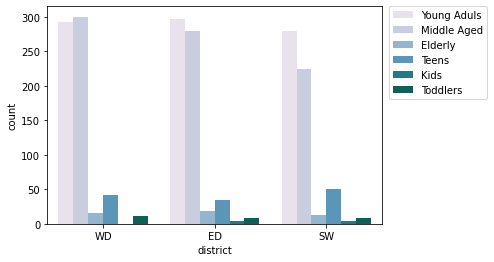

In [36]:
sns.countplot(data=com_dis, x='district', hue='age_group', palette= 'PuBuGn')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

From the comparisons above, it can be known that most of the victims have similar attributes in each district in terms of race and gender. Although interestingly enough, there are more middle aged homicide victims in the Western District of Baltimore rather than the general attribute of young adult victims when compared to the East and Southwest District, or even to the overall victim data of Baltimore.

**On what timeframe does the homicide numbers increase significantly?**

In [37]:
print(df2.groupby('date', sort = True)['date'].count())

date
2007-01-01    1
2007-01-02    2
2007-01-03    1
2007-01-05    3
2007-01-07    1
             ..
2022-03-25    2
2022-03-26    1
2022-04-03    3
2022-04-05    1
2022-04-06    2
Name: date, Length: 2875, dtype: int64


In [38]:
df2.groupby(pd.Grouper(key='date',freq="Y"))['date'].count()

date
2007-12-31    282
2008-12-31    234
2009-12-31    240
2010-12-31    224
2011-12-31    197
2012-12-31    217
2013-12-31    235
2014-12-31    211
2015-12-31    342
2016-12-31    318
2017-12-31    342
2018-12-31    309
2019-12-31    360
2020-12-31    347
2021-12-31    347
2022-12-31     86
Freq: A-DEC, Name: date, dtype: int64

in this case, we are going to ignore the data of 2022 because the year hasn't ended yet. Thus, the numbers of homicide is definitely going to be lower.

<AxesSubplot:xlabel='date'>

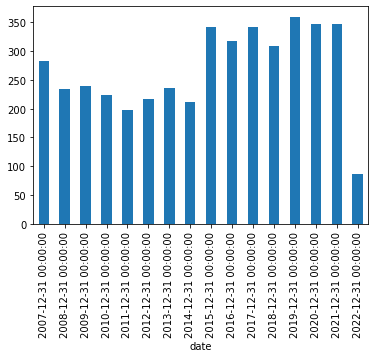

In [39]:
df2.groupby(pd.Grouper(key='date',freq="Y"))['date'].count().plot(kind='bar')

Based on the analysis, it's known that the highest numbers of cases occur in 2019. However it can be inferred from the plot that there is a sharp increase in 2015 and the data shows a dip in 2011.

**Does race have a significant correlation with the homicide method?**

In [40]:
#Resampling to have a more accurate result
resampled_data = df3.sample(1000)
resampled_data

,id,first_name,last_name,age,gender,race,cause,death_loc,district,street_address,zip_code,latitude,longitude,date,time,notes
328,4125,Harry,Prather,61.0,male,black,shooting,unknown,SD,1200 Hollins St,21223,39.287624,-76.636857,2021-05-28,2022-11-01 22:45:00,No Notes
1215,3207,Lawrence,Price,73.0,male,black,shooting,unknown,NW,4600 Liberty Heights Ave,21207,39.331290,-76.694340,2018-10-04,2022-11-01 00:24:00,No Notes
4207,85,Dewitt,Smith,25.0,male,black,shooting,shock-trauma,SW,1600 North Rosedale St.,21216,39.306180,-76.669358,2007-04-27,2022-11-01 18:30:00,No Notes
2968,1374,Jose,Carranza,32.0,male,hispanic,shooting,scene,SE,200 S Eaton Ave,21224,39.290185,-76.565747,2012-09-03,2022-11-01 22:22:00,<p>Double shooting</p>
3712,602,Russell,Day,31.0,male,white,shooting,unknown,SW,2100 Christian St,21223,39.281842,-76.649457,2009-04-13,2022-11-01 09:30:00,No Notes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,25,Jermall,Ford,31.0,male,black,shooting,shock-trauma,CD,2100 Madison Ave.,21217,39.309476,-76.635122,2007-01-24,2022-11-01 08:34:00,No Notes
2125,2274,William,Epps,30.0,male,black,shooting,unknown,ED,2100 Barclay St,21218,39.313557,-76.611320,2015-12-16,2022-11-01 09:52:00,No Notes
4241,51,Anthony,Bryan,37.0,male,black,shooting,shock-trauma,SW,3000 Rosedale Court,21216,39.302450,-76.668326,2007-03-09,2022-11-01 08:40:00,No Notes
1871,2538,Sharon,Dorsey,60.0,female,black,stabbing,shock-trauma,WD,2500 W Lafayette Ave,21216,39.298679,-76.656662,2016-10-09,2022-11-01 23:35:00,No Notes


In [41]:
contingency=pd.crosstab(resampled_data["race"],resampled_data['cause'])
contingency

cause,asphyxiation,bluntforce,other,shooting,stabbing
race,,,,,
asian,0,0,0,3,1
black,5,22,7,830,66
hispanic,1,3,1,8,4
white,2,6,0,30,11


H0= race has no significant relation to method of homicide

H1= race has a significant relation to method of homicide

In [42]:
stat, p, dof, expected = stats.chi2_contingency(contingency)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 1.0243891183590466e-10
Dependent


From the chi square testing, it's shown that the p value is below 0.05 which means that we are rejecting h0 and that race probably has a significant correlation to the method of homicide in Baltimore.

## Conclusion

In the US, Baltimore has the highet homicide per capita in the country, and based on the data it is found that the top 3 districts with the highest homicide cases are Western (WD), Eastern (ED), and Southwestern (SW). Though the cause of this is not exactly known by the author since it could also be that the population density is also higher on those three districts compared to the others.

In general, most of the victims are black male in their 20s and most of the cause of death is due to shooting. Generally, the victim's characteristics on the top 3 districts are pretty similar except for the Western District when it's according to age since most of the victims are in their 30s. This makes sense since the population of Baltimore is made up of more than 50% black people.

According to the data based on date, the year 2019 has the highest case occured. Though the numbers started to have a steep incline since 2015. The reason behind this is also unknown by the author but it also has to be highlighted that Baltimore has a long history handling gang crimes that involves shooting and murders.

It's also concluded that it's probable that race has a significant relation to the cause of death or method of homicide. A possible reason of why it shows that result might be because of how it's previously mentioned that most of the population of Baltimore is made up of one specific race and how gun violence is very common in the US and specifically Baltimore.

Based on this, the officials of Baltimore could come up with new strategies on handling the gang crimes there and perhaps revise the regulations surrounding gun ownership and gun use.


**Dataframe to excel**

In this analysis, we are separating the original dataframe into two. One is merely for describing the data while handling the missing values as little as possible, and the other has had some missing values handling done in order to describe the numerical data (age) better. We are saving those two datasets as .xlsx since we are going to visualize it in tableau. 

In [43]:
df2.to_excel('df2.xlsx')

In [44]:
df3.to_excel('df3.xlsx')